In [1]:
import sys
sys.path.append('/home/ppiper/Dropbox/local/github/explann')

from explann.dataio import ImportData
from explann.plot import LinearRegDiagnostic

In [2]:
table = ImportData("""Observação	Tempo	Dose_de_íons	Ganho
1	195	4	1004
2	255	4	1636
3	195	4.6	852
4	255	4.6	1506
5	225	4.2	1272
6	225	4.1	1270
7	225	4.6	1269
8	195	4.3	903
9	255	4.3	1555
10	225	4	1260
11	225	4.7	1146
12	225	4.3	1276
13	225	4.72	1225
14	230	4.3	1321
""", delimiter="\s")

/home/ppiper/Dropbox/local/github/explann/explann/dataio/_readers.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(StringIO(data), delimiter=delimiter, **kwargs)


In [3]:
table.data

,Observação,Tempo,Dose_de_íons,Ganho
0,1,195,4.00,1004
1,2,255,4.00,1636
2,3,195,4.60,852
3,4,255,4.60,1506
4,5,225,4.20,1272
5,6,225,4.10,1270
6,7,225,4.60,1269
7,8,195,4.30,903
8,9,255,4.30,1555
9,10,225,4.00,1260


In [4]:
from explann.models import FactorialModel

fm = FactorialModel(
    data = table.data,
    functions = {
        "Modelo_1": "Ganho ~ Tempo*Dose_de_íons",
        "Modelo_2": "Ganho ~ Tempo + Dose_de_íons",
    }
)

In [5]:
fm.lack_of_fit()

/home/ppiper/micromamba/envs/explann/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/home/ppiper/Dropbox/local/github/explann/explann/models/_base.py:313: RuntimeWarning: divide by zero encountered in scalar divide
  pure_error_mean_sq = pure_error_sum_sq/pure_error_gl


{'Modelo_1':   Source_of_Variation    df        sum_sq       mean_sq           F   F_table  \
 0          Regression   3.0  6.520871e+05  2.173624e+05  163.428933  3.708265   
 1            Residual  10.0  1.330012e+04  1.330012e+03         NaN       NaN   
 2         Lack_of_Fit  10.0  1.330012e+04  1.330012e+03    0.000000       NaN   
 3          Pure_Error   0.0  8.491526e-24           inf         NaN       NaN   
 4               Total  13.0  6.653872e+05           NaN         NaN       NaN   
 
               p  
 0  8.565448e-09  
 1           NaN  
 2           NaN  
 3           NaN  
 4           NaN  ,
 'Modelo_2':   Source_of_Variation    df         sum_sq        mean_sq           F  \
 0          Regression   2.0  651966.098954  325983.049477  267.177016   
 1            Residual  11.0   13421.115332    1220.101394         NaN   
 2         Lack_of_Fit   7.0    5318.004221     759.714889    0.375024   
 3          Pure_Error   4.0    8103.111111    2025.777778         NaN 

In [6]:
fm.anova()

{'Modelo_1':                       df         sum_sq        mean_sq           F  \
 Tempo                1.0  630967.864928  630967.864928  474.407815   
 Dose_de_íons         1.0   20998.234026   20998.234026   15.788009   
 Tempo:Dose_de_íons   1.0     121.000000     121.000000    0.090977   
 Residual            10.0   13300.115332    1330.011533         NaN   
 
                           PR(>F)  
 Tempo               9.307101e-10  
 Dose_de_íons        2.628800e-03  
 Tempo:Dose_de_íons  7.691183e-01  
 Residual                     NaN  ,
 'Modelo_2':                 df         sum_sq        mean_sq           F        PR(>F)
 Tempo          1.0  630967.864928  630967.864928  517.143795  1.342060e-10
 Dose_de_íons   1.0   20998.234026   20998.234026   17.210237  1.620499e-03
 Residual      11.0   13421.115332    1220.101394         NaN           NaN}

In [7]:
fm.summary()

/home/ppiper/micromamba/envs/explann/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/home/ppiper/micromamba/envs/explann/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


{'Modelo_1': <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  Ganho   R-squared:                       0.980
 Model:                            OLS   Adj. R-squared:                  0.974
 Method:                 Least Squares   F-statistic:                     163.4
 Date:                Wed, 12 Jul 2023   Prob (F-statistic):           8.57e-09
 Time:                        15:19:19   Log-Likelihood:                -67.860
 No. Observations:                  14   AIC:                             143.7
 Df Residuals:                      10   BIC:                             146.3
 Df Model:                           3                                         
 Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
 -------------------------------------------------

In [11]:
fm.print_equation(pvalue=0.05)

{'Modelo_1': 'Modelo_1 = ',
 'Modelo_2': 'Modelo_2 = - 520.0767 + 10.7812 Tempo - 152.1489 Dose_de_íons'}

In [35]:
fm.get_significant_model_functions(pvalue=0.5)

{'Modelo_1': 'Ganho ~ Tempo', 'Modelo_2': 'Ganho ~ 1 + Tempo + Dose_de_íons'}

In [10]:
ld = LinearRegDiagnostic(fm['Ganho'])

<Axes: title={'center': 'Normal Q-Q'}, xlabel='Theoretical Quantiles', ylabel='Standardized Residuals'>

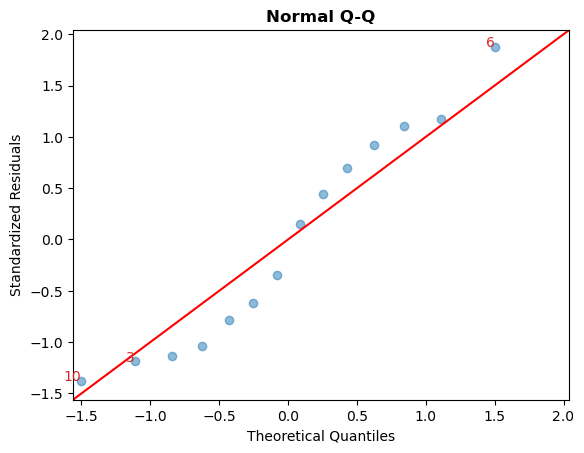

In [11]:
ld.qq_plot()

<Axes: title={'center': 'Residuals vs Fitted'}, xlabel='Fitted values', ylabel='Residuals'>

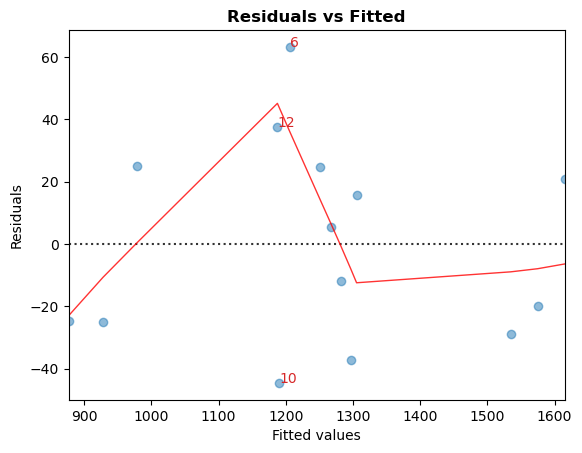

In [12]:
ld.residual_plot()

<Axes: title={'center': 'Residuals vs Leverage'}, xlabel='Leverage', ylabel='Standardized Residuals'>

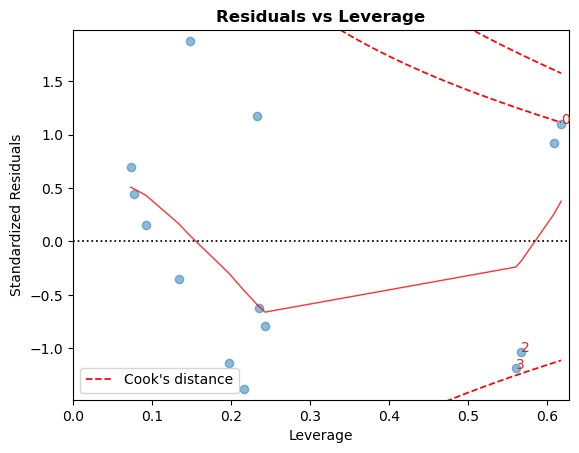

In [13]:
ld.leverage_plot()

In [15]:
dir(fm['Ganho'])

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_get_wald_nonlinear',
 '_is_nested',
 '_transform_predict_exog',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 '